In [1]:
## importing libraries which are required to implement the A* Search
import heapq
from collections import defaultdict

In [2]:
## creating the priorityQueue using heapq
class priorityQueue :
    def __init__(self) :
        self.nodes = []
    def push(self,vertex,cost):
        heapq.heappush(self.nodes,(cost,vertex))
    def pop(self):
        return heapq.heappop(self.nodes)[1]
    def isEmpty(self):
        return self.nodes == []
    def check(self):
        print(self.nodes)

In [3]:
## to create a  path tuple
def MakePath(node,weight):
    return (node,weight);

In [4]:
## create a global class called Graph in which we can initialize a graph
## also call the aStar searching algo from this initialized graph
class Graph :
    def __init__(self,nodes) :
        self.vertices = nodes
        self.graph = defaultdict(list)
        self.heuristic = defaultdict();
    def createEdge(self,u,v,w):
        # as our graph will be undirected graph
        self.graph[u].append(MakePath(v,w))
        self.graph[v].append(MakePath(u,w))
    def createHeuristic(self,node,cost):
        self.heuristic[node]=cost
    def h(self,node):
        return self.heuristic[node]
    def aStar(self,src,dist) :
        path = {}
        distance = {}
        pq = priorityQueue()
        pq.push(src,0)
        distance[src] = 0
        path[src] = None
        expandedList = []
        while  pq.isEmpty() is False:
            current = pq.pop()
            expandedList.append(current)
            if(current == dist):
                break
            for node in self.graph[current] :
                g = distance[current] + node[1]
            if node[0] not in distance or g < distance[node[0]]:
                distance[node[0]] = g
                f = g + self.h(node[0])
                pq.push(node[0],f)  
                path[node[0]] = current
        self.printPath(src,dist,path,distance,expandedList)
    def printPath(self,src,dist,path,distance,expandedList) :
        finalPath = []
        i = dist
        while path.get(i) is not None :
            finalPath.append(i)
            i = path[i]
        finalPath.append(src)
        finalPath.reverse()
        print("A-star Agorithm")
        print("\t{} to {}".format(src,dist))
        print("=======================================================")
        print("List of Nodes that Are expanded : " + str(expandedList))
        print("Total Number of Nodes that are Expanded : " + str(len(expandedList)))
        print("=======================================================")
        print("Nodes in Final path : " + str(finalPath))
        print("Total Number of Nodes in final path are : " + str(len(finalPath)))
        print("Total Cost : " + str(distance[dist]))

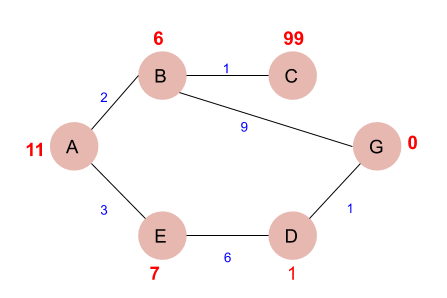

In [9]:
## you can ignore this cell 
## this cell is used to print the image of the corresponding graph
from IPython.display import Image, display

# Specify the path to your image file
image_path = './astar.png'

# Display the image
display(Image(filename=image_path))


In [5]:
# creating an object of Graph class initiated with 20 nodes
graph = Graph(6)


In [6]:
## establishing the edge between the  nodes
graph.createEdge('A','B',2)
graph.createEdge('A','E',3)
graph.createEdge('B','C',1)
graph.createEdge('D','E',6)
graph.createEdge('D','G',1)

In [7]:
## initiate the heuristic values for each of the nodes
graph.createHeuristic('A', 11)
graph.createHeuristic('B',6)
graph.createHeuristic('C', 99)
graph.createHeuristic('D', 1)
graph.createHeuristic('E', 7)
graph.createHeuristic('G',0)

In [8]:
graph.aStar('A','G')

A-star Agorithm
	A to G
List of Nodes that Are expanded : ['A', 'E', 'D', 'G']
Total Number of Nodes that are Expanded : 4
Nodes in Final path : ['A', 'E', 'D', 'G']
Total Number of Nodes in final path are : 4
Total Cost : 10
